# Modelling of France Accidents

**Cohort:** mar23_accidents

**Author:** Johanna Starkl

**Date:** 29 October 2023

### Decision Tree with target variable severe



## Loading of required libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA



ImportError: cannot import name 'pca' from 'sklearn.decomposition' (/Users/johannastarkl/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/__init__.py)

## Importing the data

In [2]:
df = pd.read_csv('./data/231030_clean_table_for_analysis.csv', low_memory = False, index_col = 0)

## Data description
### Data

In [3]:
df.head()

,place,catu,grav,sexe,an_nais,trajet,locp,an,mois,jour,...,manv,date,is_holiday,holiday,datetime,actp,num_veh,etatp,day_of_week,hour_of_day
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,2.0,2,4,2,2002,0.0,-1.0,2019,11,30,...,23.0,2019-11-30,False,NaN,2019-11-30 01:30:00,0,14,0,5,1
201900000001,1.0,1,4,2,1993,5.0,-1.0,2019,11,30,...,23.0,2019-11-30,False,NaN,2019-11-30 01:30:00,0,14,0,5,1
201900000001,1.0,1,1,1,1959,0.0,-1.0,2019,11,30,...,11.0,2019-11-30,False,NaN,2019-11-30 01:30:00,0,0,0,5,1
201900000002,1.0,1,4,2,1994,0.0,-1.0,2019,11,30,...,0.0,2019-11-30,False,NaN,2019-11-30 02:50:00,0,0,0,5,2
201900000003,1.0,1,1,1,1996,0.0,-1.0,2019,11,28,...,2.0,2019-11-28,False,NaN,2019-11-28 15:15:00,1,0,0,3,15


### Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 42 columns):
 #   Column       Dtype  
---  ------       -----  
 0   place        float64
 1   catu         int64  
 2   grav         int64  
 3   sexe         int64  
 4   an_nais      int64  
 5   trajet       float64
 6   locp         float64
 7   an           int64  
 8   mois         int64  
 9   jour         int64  
 10  hrmn         object 
 11  lum          int64  
 12  agg          int64  
 13  int          int64  
 14  atm          float64
 15  col          float64
 16  dep          int64  
 17  catr         float64
 18  circ         float64
 19  nbv          float64
 20  vosp         float64
 21  prof         float64
 22  plan         float64
 23  surf         float64
 24  infra        float64
 25  situ         float64
 26  senc         float64
 27  catv         int64  
 28  occutc       float64
 29  obs          float64
 30  obsm         float64
 31  choc         

### Missing data

In [5]:
df.isna().sum()

place                0
catu                 0
grav                 0
sexe                 0
an_nais              0
trajet               0
locp                 0
an                   0
mois                 0
jour                 0
hrmn                 0
lum                  0
agg                  0
int                  0
atm                  0
col                  0
dep                  0
catr                 0
circ                 0
nbv                  0
vosp                 0
prof                 0
plan                 0
surf                 0
infra                0
situ                 0
senc                 0
catv                 0
occutc               0
obs                  0
obsm                 0
choc                 0
manv                 0
date                 0
is_holiday           0
holiday        2367768
datetime             0
actp                 0
num_veh              0
etatp                0
day_of_week          0
hour_of_day          0
dtype: int64

This data has no missing values, accept the `holiday` variable which contains the name of the holiday or NaN.

### Drop variables
The dataset contains still some variables that represent information represented by other variables or are a finer granulation. The latter might be added later, if the primary variable is relevant.

- `holiday`: classifies the holiday, but will be used only, if `is_holiday` is relevant
- `datetime`: was required to create other datetime variables
- `hrmn`: was required to create time related variables

In [6]:
columns_drop = ['holiday', 'hrmn', 'datetime']

df.drop(columns = columns_drop, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 39 columns):
 #   Column       Dtype  
---  ------       -----  
 0   place        float64
 1   catu         int64  
 2   grav         int64  
 3   sexe         int64  
 4   an_nais      int64  
 5   trajet       float64
 6   locp         float64
 7   an           int64  
 8   mois         int64  
 9   jour         int64  
 10  lum          int64  
 11  agg          int64  
 12  int          int64  
 13  atm          float64
 14  col          float64
 15  dep          int64  
 16  catr         float64
 17  circ         float64
 18  nbv          float64
 19  vosp         float64
 20  prof         float64
 21  plan         float64
 22  surf         float64
 23  infra        float64
 24  situ         float64
 25  senc         float64
 26  catv         int64  
 27  occutc       float64
 28  obs          float64
 29  obsm         float64
 30  choc         float64
 31  manv         

## Data preparation
### Encode or drop date variables
The date and time variables are maybe important as grouping variables or as contrains for time dependent severity of accidents.

_Problem_:

Due to the export to `csv`, the `datatime` data time is lost and thus, it is required to assign it again.

**Steps:**
1. Fix `date` variable and transform to `integer`.

In [8]:
df = df.assign(date = pd.to_datetime(df['date']))
df['date'] = df.apply(lambda x: int(x['date'].timestamp()), axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 39 columns):
 #   Column       Dtype  
---  ------       -----  
 0   place        float64
 1   catu         int64  
 2   grav         int64  
 3   sexe         int64  
 4   an_nais      int64  
 5   trajet       float64
 6   locp         float64
 7   an           int64  
 8   mois         int64  
 9   jour         int64  
 10  lum          int64  
 11  agg          int64  
 12  int          int64  
 13  atm          float64
 14  col          float64
 15  dep          int64  
 16  catr         float64
 17  circ         float64
 18  nbv          float64
 19  vosp         float64
 20  prof         float64
 21  plan         float64
 22  surf         float64
 23  infra        float64
 24  situ         float64
 25  senc         float64
 26  catv         int64  
 27  occutc       float64
 28  obs          float64
 29  obsm         float64
 30  choc         float64
 31  manv         

The correlation matrix shows some intervariable correlations, but no real importance of variables to predict the target `fatal`. 

#### Aggregation and encoding of the target variable
In the previous notebook, we used the `grav` variable as is without any further processing. The modelling result was not satisfying. Therefore, it was decided to aggregate the four classes into two classes "severe" and "non-severe" encoded in `[1,0]`.

In [10]:
# Encoding
df['severe'] = np.where(df['grav'].isin([1, 2]), 0, 1)

In [11]:
df.severe.unique()

array([1, 0])

The following visualisation shows the balance between the two classes. The dataset is much more balanced now compared to the four classes `grav`.

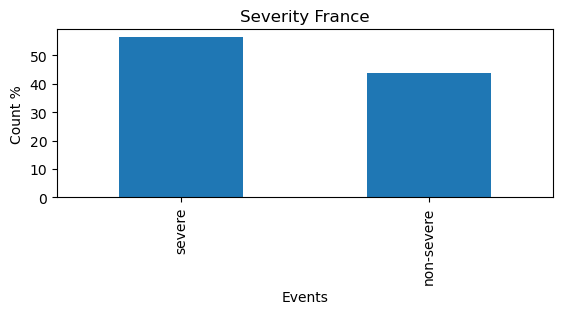

In [12]:
# checking the variables graphically and their distribution

# exploring severe cases in % 
event_counts = df['severe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['severe','non-severe']
# Add labels and title to the plot
plt.xticks(range(len(event_counts)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France')
# Display the plot
plt.show()

## Data analysis
### Correlation matrix
To get a first glimpse on the possible contrains in the data, a correlation matrix is plotted.

In [13]:
# Sort columns
columns = df.columns.sort_values()
df = df[columns]

In [14]:
# Scale the data
scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

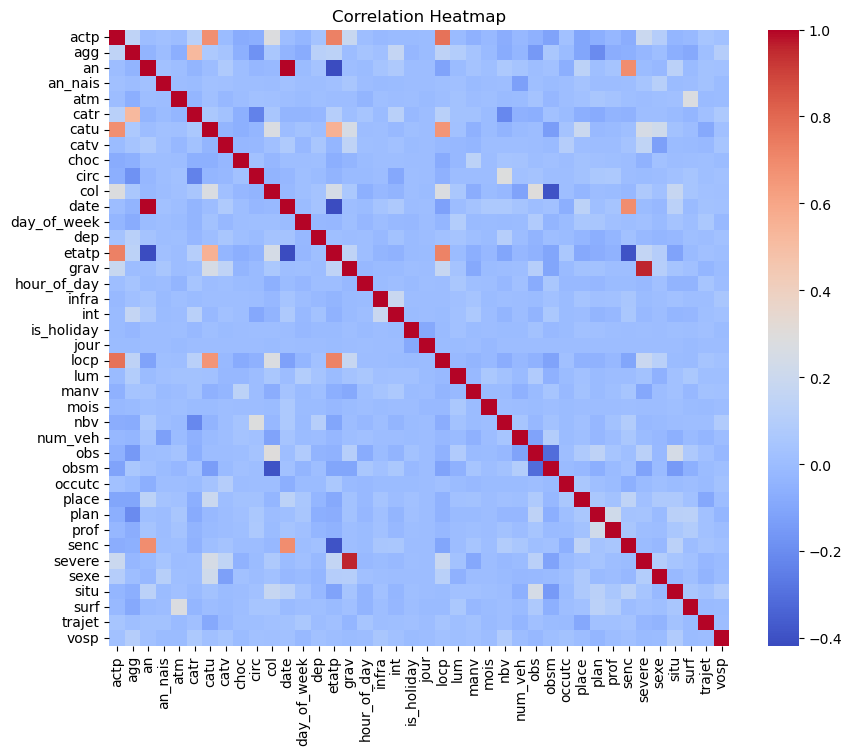

In [15]:
# Create a correlation matrix
correlation_matrix = df_numeric_scaled.corr()
plt.figure(figsize=(10, 8))
# Generate the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show();

### Preparation of the training and test datasets
#### Split data
The dataset is split by year slides. We decided to drop the Covid-19 years 2020-21. The years 2005 to 2017 are selected for the train dataset and the years 2018 and 2019 for the test dataset. Furthermore, the `grav` variable is dropped because it is encoded in `severe`.


In [16]:
df.drop('grav', axis = 1, inplace = True)

In [17]:
# split the dataset to train and test data
X_train = df.loc[df['an'] < 2018]
X_train = X_train.drop('severe', axis = 1)

X_test = df[(df['an'] >= 2018) & (df['an'] < 2020)]
X_test = X_test.drop('severe', axis = 1)

y_train = df['severe'].loc[df['an'] < 2018]
y_test = df['severe'][(df['an'] >= 2018) & (df['an'] < 2020)]



#y_train = LabelEncoder.fit_transform(y_train)
#y_test = LabelEncoder.fit_transform(y_test)


#### Data scaling
Decision trees are not sensitive to different scales and thus scaling is not required.

### Modelling the data using a Decision Tree Model

In [18]:
#DecisionTree Classifier

# Tuning the parameters to find the best decision tree model - start params chosen randomly
model = DecisionTreeClassifier(random_state=50)

param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf' : [1, 2, 3], 
              'min_samples_split' : [2, 3, 4], 
              'ccp_alpha': [0.1, 0.01, 0.001]}
            

cv_dt = GridSearchCV(model, param_grid=param_dist, n_jobs=-1)

cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search: \n')
print(cv_dt.best_params_)

Best Parameters using grid search: 

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Find optimal parameter for max_depth
Since the best parameter for max_depth is always the maximum of the predefined range, i.e. 10 for 'max_depth': [2, 4, 6, 8, 10] or 8 for 'max_depth': [2, 4, 6, 8], i want to find out, at which point the accuracy doesn't improve further. 
Therefore i've chosen the evaluation metric AUC (Area Under Curve). AUC provides an aggregate measure of performance across all possible classification thresholds.

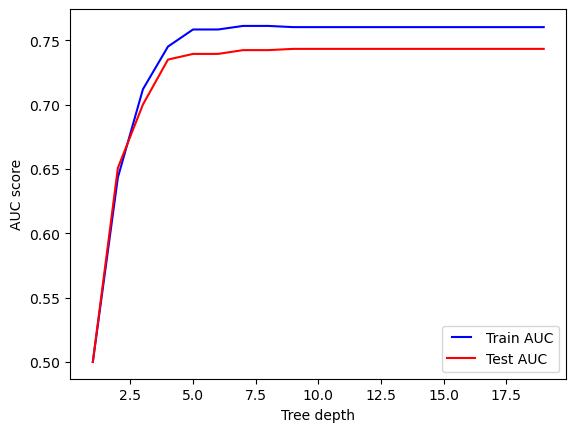

In [19]:

max_depths = range(1, 20, 1)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', random_state = 50, max_depth=max_depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.001)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

### Train with best parameters

In [20]:
# Training with the best parameters

tree = DecisionTreeClassifier(criterion='entropy', random_state = 50, max_depth=10, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.001)

tree.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = tree.predict(X_test)


# Get the accuracy score
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

Accuracy Score:  0.7517502372698284


### Classification Report

In [21]:
print('Classification Report')
print(classification_report(y_test, y_pred))



Classification Report
              precision    recall  f1-score   support

           0       0.74      0.67      0.71    111446
           1       0.76      0.82      0.79    140377

    accuracy                           0.75    251823
   macro avg       0.75      0.74      0.75    251823
weighted avg       0.75      0.75      0.75    251823



### Confusion Matrix

In [22]:
pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Prediction'])


Prediction,0,1
Reality,,
0,74724,36722
1,25793,114584


### Accuracy

In [23]:
#Training set accuracy

y_pred_train = tree.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7677


In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree.score(X_test, y_test)))

Training set score: 0.7677
Test set score: 0.7518


In [25]:


train_mae = mean_absolute_error(y_pred_train, y_train)

test_mae = mean_absolute_error(y_pred, y_test)

print('Training MAE is:', train_mae)
print('Testing MAE is:', test_mae)

Training MAE is: 0.23227105945141507
Testing MAE is: 0.2482497627301716


#### Since the accuracy and the MAE of the test set and training data set only differ marginally from each other, there is no oversampling. 

### Feature Importance

Length of feature_names: 38
Length of importances: 38


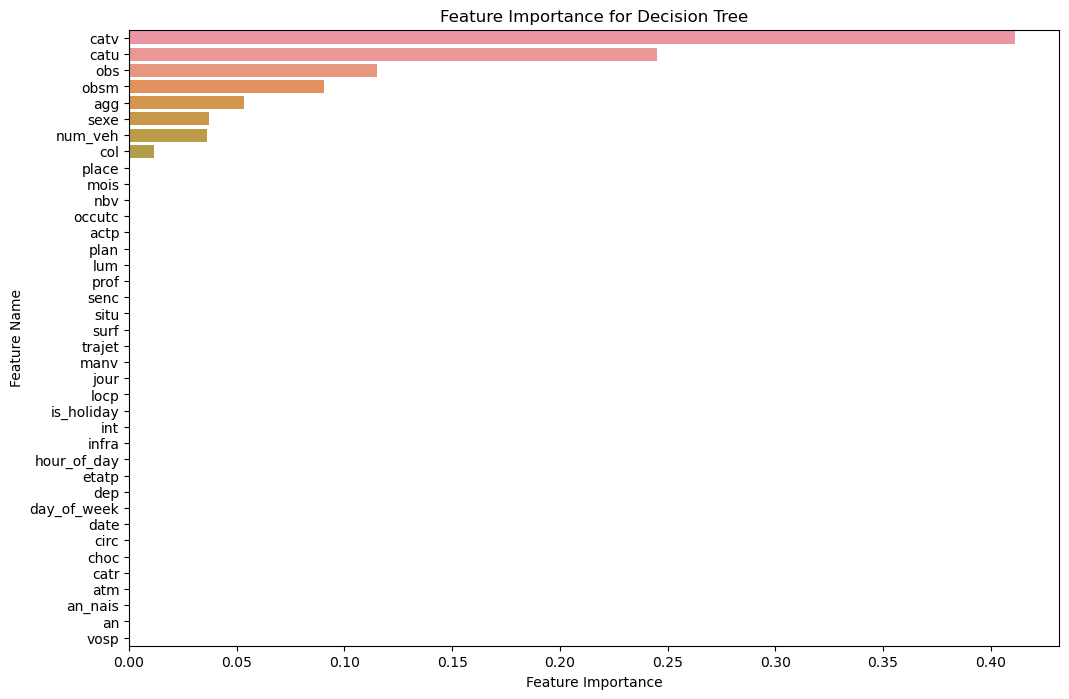

In [26]:
# estimate the feature importance for the model

# Access feature importances from the trained model
importances = tree.feature_importances_

feature_names = df.drop(columns=['severe']).columns.tolist()

# Check the lengths of feature_names and importances
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree')
plt.show()





In [27]:
# Perform cross-validation with F1 score
f1_scores = cross_val_score(tree, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=2)

# Print the F1 scores for each fold
print("F1 Scores (Cross-Validation):", f1_scores)

# Calculate and print the mean F1 score
mean_f1_score = f1_scores.mean()
print("Mean F1 Score (Cross-Validation):", mean_f1_score)

F1 Scores (Cross-Validation): [0.76285987 0.76119739 0.76230944 0.76544354 0.75820382]
Mean F1 Score (Cross-Validation): 0.7620028118157416


## PCA

In [28]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



###### Create a fit model with N number of components and plot and evaluate visually the "elbow" of the curve where at least 90% of the variance is explained

In [32]:
# Create and fit the PCA model

n_components = 30  # need to test until the right value is found based on the graphic beyond look like the best value to explain the variance 
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

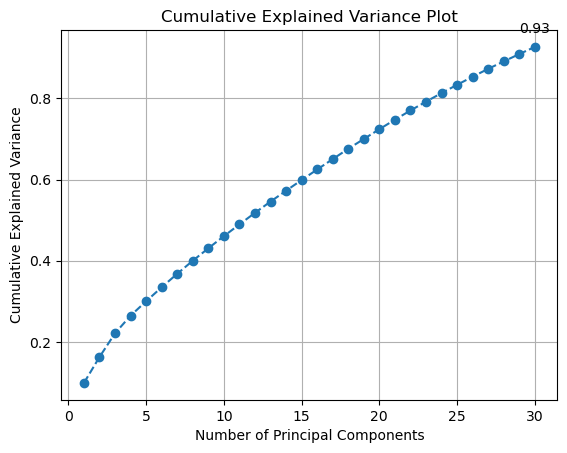

In [33]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')

# Annotate the last point with the cumulative variance value
last_point = (n_components, cumulative_variance[-1])
plt.annotate(f'{cumulative_variance[-1]:.2f}', last_point, textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid()
plt.show()



### Decision Tree with PCA

In [34]:
# Training with the best parameters

tree_pca = DecisionTreeClassifier(criterion='entropy', random_state = 50, max_depth=10, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.001)

tree_pca.fit(X_train_pca, y_train)

# Make predictions
y_pred_pca = tree_pca.predict(X_test_pca)


# Get the accuracy score
print('Accuracy Score: ',accuracy_score(y_test, y_pred_pca))

Accuracy Score:  0.6220758230979696


In [35]:
# Confusion Matrix
pd.crosstab(y_test, y_pred_pca, rownames=['Reality'], colnames=['Prediction'])


Prediction,0,1
Reality,,
0,71761,39685
1,55485,84892


In [36]:
#Classification Report

print('Classification Report')
print(classification_report(y_test, y_pred_pca))



Classification Report
              precision    recall  f1-score   support

           0       0.56      0.64      0.60    111446
           1       0.68      0.60      0.64    140377

    accuracy                           0.62    251823
   macro avg       0.62      0.62      0.62    251823
weighted avg       0.63      0.62      0.62    251823



#### Accuracy without PCA: 75% 

#### Accuracy with PCA: 62%

### No improvement with PCA!